## 2013 NYC Flight Data Analysis

In this notebook, we are going to analyze NYC Flight dataset for the year 2013. We'll look at various insight and will answer few questions based on our analysis.

In [53]:
csv_file = "C:/Users/aarti_/python/projects/Datasets/Project_1_NYC-Flight data/flight_data.csv"

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime as dt
import seaborn as sns

import pandas_profiling

import calendar

In [55]:
flights_df = pd.read_csv(csv_file) 
display(flights_df.head(5))


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


In [6]:
report = pandas_profiling.ProfileReport(flights_df)
#covert profile report as html file
report.to_file("flights_data.html")
#titanic_input.drop(['Cabin'],axis=1,inplace=True)

In [15]:
#lets calculate some values on dataset
flights_df.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [16]:
print (flights_df.shape)
print (flights_df.columns)
print (flights_df.dtypes)

(336776, 19)
Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour'],
      dtype='object')
year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
hour                int64
minute              int64
time_hour          object
dtype: object


These are all the destinations for flights from NYC

In [17]:
print(flights_df.dest.unique())

['IAH' 'MIA' 'BQN' 'ATL' 'ORD' 'FLL' 'IAD' 'MCO' 'PBI' 'TPA' 'LAX' 'SFO'
 'DFW' 'BOS' 'LAS' 'MSP' 'DTW' 'RSW' 'SJU' 'PHX' 'BWI' 'CLT' 'BUF' 'DEN'
 'SNA' 'MSY' 'SLC' 'XNA' 'MKE' 'SEA' 'ROC' 'SYR' 'SRQ' 'RDU' 'CMH' 'JAX'
 'CHS' 'MEM' 'PIT' 'SAN' 'DCA' 'CLE' 'STL' 'MYR' 'JAC' 'MDW' 'HNL' 'BNA'
 'AUS' 'BTV' 'PHL' 'STT' 'EGE' 'AVL' 'PWM' 'IND' 'SAV' 'CAK' 'HOU' 'LGB'
 'DAY' 'ALB' 'BDL' 'MHT' 'MSN' 'GSO' 'CVG' 'BUR' 'RIC' 'GSP' 'GRR' 'MCI'
 'ORF' 'SAT' 'SDF' 'PDX' 'SJC' 'OMA' 'CRW' 'OAK' 'SMF' 'TUL' 'TYS' 'OKC'
 'PVD' 'DSM' 'PSE' 'BHM' 'CAE' 'HDN' 'BZN' 'MTJ' 'EYW' 'PSP' 'ACK' 'BGR'
 'ABQ' 'ILM' 'MVY' 'SBN' 'LEX' 'CHO' 'TVC' 'ANC' 'LGA']


In [18]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 48.8+ MB


#### As there are missing values, we need to drop some rows which doesn't have dep_time, arr_time and air_time. I assume these flights have been cancelled for one or the other reason.

In [57]:
rows_to_drop = pd.DataFrame(flights_df[flights_df.isnull()['dep_time']])
rows_to_drop = rows_to_drop[rows_to_drop.isnull()['arr_time']]
rows_to_drop = rows_to_drop[rows_to_drop.isnull()['air_time']] #not so eligant, still looking for better solution to get the rows with NA in dept_time, arr_time and air_time columns

flights_df = flights_df.drop(rows_to_drop.index, axis=0).reset_index(drop=True)
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328521 entries, 0 to 328520
Data columns (total 19 columns):
year              328521 non-null int64
month             328521 non-null int64
day               328521 non-null int64
dep_time          328521 non-null float64
sched_dep_time    328521 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    328521 non-null int64
arr_delay         327346 non-null float64
carrier           328521 non-null object
flight            328521 non-null int64
tailnum           328521 non-null object
origin            328521 non-null object
dest              328521 non-null object
air_time          327346 non-null float64
distance          328521 non-null int64
hour              328521 non-null int64
minute            328521 non-null int64
time_hour         328521 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 47.6+ MB


In [20]:
display(flights_df.iloc[471:480,:])

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
471,2013,1,1,1525.0,1530,-5.0,1934.0,1805,NaN,MQ,4525,N719MQ,LGA,XNA,NaN,1147,15,30,01-01-2013 15:00
472,2013,1,1,1526.0,1530,-4.0,1714.0,1650,24.0,WN,4105,N280WN,EWR,MDW,141.0,711,15,30,01-01-2013 15:00
473,2013,1,1,1527.0,1530,-3.0,1841.0,1855,-14.0,AA,1039,N3HYAA,JFK,FLL,163.0,1069,15,30,01-01-2013 15:00
474,2013,1,1,1527.0,1455,32.0,1655.0,1628,27.0,B6,8,N607JB,JFK,BUF,66.0,301,14,55,01-01-2013 14:00
475,2013,1,1,1527.0,1533,-6.0,1836.0,1857,-21.0,B6,137,N794JB,JFK,RSW,168.0,1074,15,33,01-01-2013 15:00
476,2013,1,1,1527.0,1515,12.0,1854.0,1810,44.0,UA,1695,N69059,EWR,IAH,210.0,1400,15,15,01-01-2013 15:00
477,2013,1,1,1528.0,1459,29.0,2002.0,1647,NaN,EV,3806,N17108,EWR,STL,NaN,872,14,59,01-01-2013 14:00
478,2013,1,1,1528.0,1530,-2.0,1731.0,1725,6.0,AA,2223,N573AA,LGA,STL,160.0,888,15,30,01-01-2013 15:00
479,2013,1,1,1529.0,1457,32.0,1720.0,1634,46.0,UA,459,N497UA,EWR,ORD,138.0,719,14,57,01-01-2013 14:00


In [21]:
flights_df['arr_delay'] = flights_df.apply(
    lambda row: row.arr_time - row.sched_arr_time if pd.isnull(row.arr_delay) and not pd.isnull(row.arr_time) else row.arr_delay,
    axis=1
)
    
display(flights_df.iloc[471:480,:])
flights_df.info()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
471,2013,1,1,1525.0,1530,-5.0,1934.0,1805,129.0,MQ,4525,N719MQ,LGA,XNA,NaN,1147,15,30,01-01-2013 15:00
472,2013,1,1,1526.0,1530,-4.0,1714.0,1650,24.0,WN,4105,N280WN,EWR,MDW,141.0,711,15,30,01-01-2013 15:00
473,2013,1,1,1527.0,1530,-3.0,1841.0,1855,-14.0,AA,1039,N3HYAA,JFK,FLL,163.0,1069,15,30,01-01-2013 15:00
474,2013,1,1,1527.0,1455,32.0,1655.0,1628,27.0,B6,8,N607JB,JFK,BUF,66.0,301,14,55,01-01-2013 14:00
475,2013,1,1,1527.0,1533,-6.0,1836.0,1857,-21.0,B6,137,N794JB,JFK,RSW,168.0,1074,15,33,01-01-2013 15:00
476,2013,1,1,1527.0,1515,12.0,1854.0,1810,44.0,UA,1695,N69059,EWR,IAH,210.0,1400,15,15,01-01-2013 15:00
477,2013,1,1,1528.0,1459,29.0,2002.0,1647,355.0,EV,3806,N17108,EWR,STL,NaN,872,14,59,01-01-2013 14:00
478,2013,1,1,1528.0,1530,-2.0,1731.0,1725,6.0,AA,2223,N573AA,LGA,STL,160.0,888,15,30,01-01-2013 15:00
479,2013,1,1,1529.0,1457,32.0,1720.0,1634,46.0,UA,459,N497UA,EWR,ORD,138.0,719,14,57,01-01-2013 14:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328521 entries, 0 to 328520
Data columns (total 19 columns):
year              328521 non-null int64
month             328521 non-null int64
day               328521 non-null int64
dep_time          328521 non-null float64
sched_dep_time    328521 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    328521 non-null int64
arr_delay         328063 non-null float64
carrier           328521 non-null object
flight            328521 non-null int64
tailnum           328521 non-null object
origin            328521 non-null object
dest              328521 non-null object
air_time          327346 non-null float64
distance          328521 non-null int64
hour              328521 non-null int64
minute            328521 non-null int64
time_hour         328521 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 47.6+ MB


In [38]:
group_by_origin_dest = flights_df.groupby(['origin','dest'])
group_by_origin_dest.describe()

air_time                                                       \
               count        mean        std    min     25%    50%     75%   
origin dest                                                                 
EWR    ALB     418.0   31.787081   3.084754   24.0   30.00   31.0   33.00   
       ANC       8.0  413.125000  14.672009  388.0  404.00  414.5  420.50   
       ATL    4876.0  111.993847   9.993083   88.0  105.00  111.0  118.00   
       AUS     957.0  211.247649  17.908306  174.0  198.00  210.0  223.00   
       AVL     251.0   89.796813   7.454029   76.0   84.50   89.0   94.00   
       BDL     412.0   25.466019   3.285493   20.0   23.00   25.0   27.00   
       BNA    2241.0  114.509148  10.932669   70.0  106.00  113.0  121.00   
       BOS    5247.0   40.312750   4.922072   30.0   37.00   40.0   43.00   
       BQN     295.0  196.172881   8.884019  173.0  190.00  196.0  200.00   
       BTV     886.0   46.257336   3.673901   34.0   44.00   46.0   48.00   
       BUF     936.0   51.153846   4.045972   40.0   48.00   51.0   53.00   
       BWI     524.0   37.164122   4.108911   31.0   34.00   37.0   39.00   
       BZN      35.0  258.371429  12.667898  241.0  247.50  256.0  267.00   
       CAE      94.0   92.148936   7.776388   79.0   87.00   90.0   96.75   
       CHS    1343.0   95.746091   8.329218   75.0   89.00   94.0  101.00   
       CLE    1730.0   66.276879   5.799941   54.0   62.00   66.0   70.00   
       CLT    4893.0   84.975680   8.930687   64.0   78.00   83.0   90.00   
       CMH     686.0   76.310496   6.402881   57.0   72.00   75.0   80.00   
       CVG    2513.0   96.068046   8.453068   62.0   90.00   95.0  101.00   
       DAY    1057.0   86.077578   7.691349   71.0   80.00   85.0   91.00   
       DCA    1567.0   42.604978   5.145550   32.0   39.00   42.0   45.00   
       DEN    2815.0  224.933925  15.473982  182.0  214.00  224.0  234.00   
       DFW    3014.0  197.060717  17.324243  158.0  184.00  196.0  208.00   
       DSM     390.0  149.541026  13.085132  124.0  140.00  147.0  157.00   
       DTW    3009.0   84.834164   7.519042   67.0   80.00   84.0   89.00   
       EGE     106.0  253.584906  16.020741  222.0  244.00  252.0  261.00   
       FLL    3740.0  152.095455  12.170569  123.0  143.00  151.0  159.00   
       GRR     688.0   96.715116   8.599970   69.0   90.00   95.0  102.00   
       GSO    1045.0   71.852632   6.330558   60.0   68.00   71.0   75.00   
       GSP     692.0   93.219653   8.089461   55.0   87.00   92.0   99.00   
...              ...         ...        ...    ...     ...    ...     ...   
LGA    MDW    2037.0  112.865979   9.266636   94.0  106.00  112.0  118.00   
       MEM     840.0  140.409524  11.942608  112.0  131.00  139.0  148.00   
       MHT     108.0   35.435185   2.167186   31.0   34.00   35.5   37.00   
       MIA    5702.0  154.148720  11.072847  125.0  146.00  153.0  160.00   
       MKE    1479.0  113.404327   8.931108   95.0  107.00  112.0  118.00   
       MSN     211.0  120.436019   9.700733  102.0  112.00  120.0  127.00   
       MSP    3620.0  149.220994  11.254046  122.0  141.00  148.0  156.00   
       MSY     998.0  167.360721  14.196293  139.0  157.00  165.0  177.00   
       MYR       3.0   93.333333  25.324560   74.0   79.00   84.0  103.00   
       OMA      91.0  161.626374  12.964609  140.0  151.50  161.0  169.50   
       ORD    8507.0  115.799812   9.865270   94.0  109.00  114.0  121.00   
       ORF     195.0   52.128205   5.579692   37.0   48.00   51.0   55.00   
       PBI    2429.0  146.137093  11.305904  105.0  138.00  145.0  153.00   
       PHL     598.0   37.026756   6.322379   26.0   32.00   36.0   40.00   
       PIT    1012.0   57.739130   4.625771   40.0   54.00   57.0   61.00   
       PWM     273.0   43.893773   3.311033   38.0   42.00   44.0   46.00   
       RDU    3370.0   70.557864   6.073782   55.0   66.00   70.0   74.00   
       RIC     495.0   54.214141   5.685998   43.0   50.00   54.0   57.00   
       R

In [39]:
group_by_origin_dest = flights_df.groupby(['origin','dest'])

def impute_average(series):
    return series.fillna(series.mean())

flights_df.arr_delay = group_by_origin_dest.arr_delay.transform(impute_average)
flights_df.air_time = group_by_origin_dest.air_time.transform(impute_average)

flights_df.arr_time.fillna(flights_df.sched_arr_time + flights_df.arr_delay, inplace=True)
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328521 entries, 0 to 328520
Data columns (total 19 columns):
year              328521 non-null int64
month             328521 non-null int64
day               328521 non-null int64
dep_time          328521 non-null float64
sched_dep_time    328521 non-null int64
dep_delay         328521 non-null float64
arr_time          328521 non-null float64
sched_arr_time    328521 non-null int64
arr_delay         328521 non-null float64
carrier           328521 non-null object
flight            328521 non-null int64
tailnum           328521 non-null object
origin            328521 non-null object
dest              328521 non-null object
air_time          328521 non-null float64
distance          328521 non-null int64
hour              328521 non-null int64
minute            328521 non-null int64
time_hour         328521 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 47.6+ MB


In [40]:
display(flights_df.iloc[471:480,:])

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
471,2013,1,1,1525.0,1530,-5.0,1934.0,1805,129.0,MQ,4525,N719MQ,LGA,XNA,173.165021,1147,15,30,01-01-2013 15:00
472,2013,1,1,1526.0,1530,-4.0,1714.0,1650,24.0,WN,4105,N280WN,EWR,MDW,141.000000,711,15,30,01-01-2013 15:00
473,2013,1,1,1527.0,1530,-3.0,1841.0,1855,-14.0,AA,1039,N3HYAA,JFK,FLL,163.000000,1069,15,30,01-01-2013 15:00
474,2013,1,1,1527.0,1455,32.0,1655.0,1628,27.0,B6,8,N607JB,JFK,BUF,66.000000,301,14,55,01-01-2013 14:00
475,2013,1,1,1527.0,1533,-6.0,1836.0,1857,-21.0,B6,137,N794JB,JFK,RSW,168.000000,1074,15,33,01-01-2013 15:00
476,2013,1,1,1527.0,1515,12.0,1854.0,1810,44.0,UA,1695,N69059,EWR,IAH,210.000000,1400,15,15,01-01-2013 15:00
477,2013,1,1,1528.0,1459,29.0,2002.0,1647,355.0,EV,3806,N17108,EWR,STL,134.293176,872,14,59,01-01-2013 14:00
478,2013,1,1,1528.0,1530,-2.0,1731.0,1725,6.0,AA,2223,N573AA,LGA,STL,160.000000,888,15,30,01-01-2013 15:00
479,2013,1,1,1529.0,1457,32.0,1720.0,1634,46.0,UA,459,N497UA,EWR,ORD,138.000000,719,14,57,01-01-2013 14:00


In [8]:
from collections import Counter
def detect_outliers(df,n,features):
    outlier_indices = []
    
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from dep_delay, arr_delay , air_time
Outliers_to_drop = detect_outliers(flights_df,2,["dep_delay"])

Outliers_to_drop

[]

#### Now, there is no more missing data, we can answer a few questions based on some insights
### Q1. What is the best time of the day/day of the week to fly to minimize delays?

In [41]:
flights_df['time_hour'] = pd.to_datetime(flights_df['time_hour'])
flights_df['week_day'] = flights_df['time_hour'].dt.weekday

flights_df.tail(15)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,week_day
328506,2013,9,30,2149.0,2156,-7.0,2245.0,2308,-23.0,UA,523,N813UA,EWR,BOS,37.0,200,21,56,2013-09-30 21:00:00,0
328507,2013,9,30,2150.0,2159,-9.0,2250.0,2306,-16.0,EV,3842,N10575,EWR,MHT,39.0,209,21,59,2013-09-30 21:00:00,0
328508,2013,9,30,2159.0,1845,194.0,2344.0,2030,194.0,9E,3320,N906XJ,JFK,BUF,50.0,301,18,45,2013-09-30 18:00:00,0
328509,2013,9,30,2203.0,2205,-2.0,2339.0,2331,8.0,EV,5311,N722EV,LGA,BGR,61.0,378,22,5,2013-09-30 22:00:00,0
328510,2013,9,30,2207.0,2140,27.0,2257.0,2250,7.0,MQ,3660,N532MQ,LGA,BNA,97.0,764,21,40,2013-09-30 21:00:00,0
328511,2013,9,30,2211.0,2059,72.0,2339.0,2242,57.0,EV,4672,N12145,EWR,STL,120.0,872,20,59,2013-09-30 20:00:00,0
328512,2013,9,30,2231.0,2245,-14.0,2335.0,2356,-21.0,B6,108,N193JB,JFK,PWM,48.0,273,22,45,2013-09-30 22:00:00,0
328513,2013,9,30,2233.0,2113,80.0,112.0,30,42.0,UA,471,N578UA,EWR,SFO,318.0,2565,21,13,2013-09-30 21:00:00,0
328514,2013,9,30,2235.0,2001,154.0,59.0,2249,130.0,B6,1083,N804JB,JFK,MCO,123.0,944,20,1,2013-09-30 20:00:00,0
328515,2013,9,30,2237.0,2245,-8.0,2345.0,2353,-8.0,B6,234,N318JB,JFK,BTV,43.0,266,22,45,2013-09-30 22:00:00,0


hour,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
week_day,,,,,,,,,,,,,,,,,,,
0,-5.090253,-2.841834,-4.661190,-1.047847,-0.424935,2.875459,4.076553,5.215227,9.361712,13.198363,17.551176,15.888649,18.874204,16.341076,13.682321,16.948209,20.805538,20.079612,18.292517
1,-5.006757,-2.849798,-4.412070,-0.942103,-0.275012,-0.543982,1.335750,3.495771,6.619388,9.396416,10.583332,11.430131,11.941679,8.558317,9.335950,9.189877,9.920000,14.018868,9.750000
2,-4.756364,-2.150875,-4.071167,3.177613,0.516710,2.453608,1.723231,4.617459,7.682966,11.461004,14.261627,10.951939,16.250663,14.921087,16.868835,14.275144,18.684075,12.008333,13.000000
3,-3.406897,-1.946538,-3.818222,2.214066,2.020584,3.428579,4.669741,6.548490,10.248184,12.809978,16.575512,14.692125,18.564400,15.543619,17.907759,18.513317,21.802678,20.619525,14.651316
4,-6.604317,-2.957009,-3.783538,-2.518275,-2.267994,-0.087566,-0.166207,3.059901,5.745177,6.109271,10.546912,10.669909,14.589486,11.862923,13.815359,11.605229,15.474471,10.109339,14.060403
5,-2.100358,-1.902758,-4.059312,-0.216857,0.822075,3.030620,5.550814,4.438410,5.775826,9.943951,10.082203,10.011914,10.399757,10.224674,13.025480,12.557715,10.768735,14.941176,10.831169
6,-3.566265,-5.341977,-9.317659,-5.814789,-6.695620,-0.913479,-2.633812,1.415537,4.408593,6.970801,11.800122,11.918816,16.257292,15.539863,17.060571,17.523114,17.227385,19.339474,13.965753


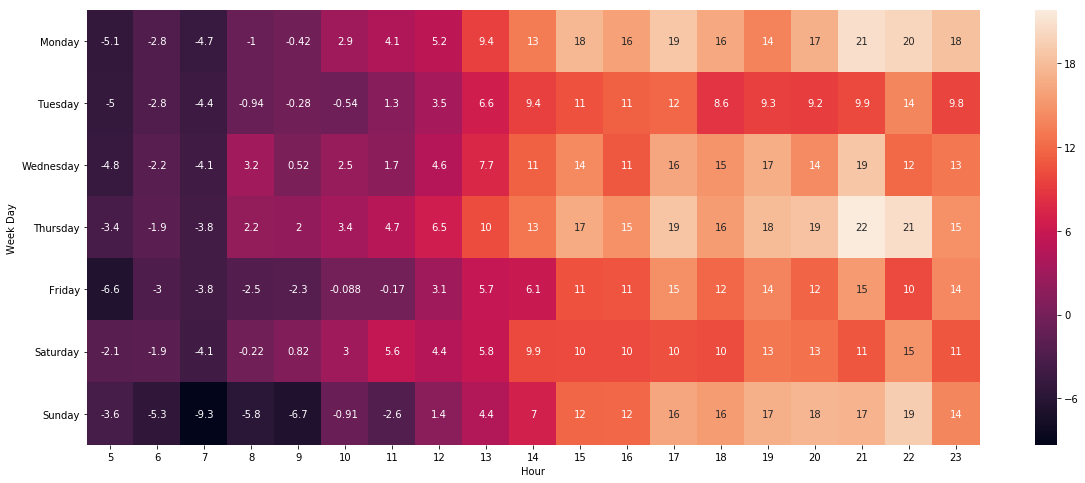

In [42]:
data = flights_df.pivot_table(index='week_day', columns='hour', values='arr_delay')
plt.figure(figsize=(20,8))
ax = sns.heatmap(data, annot=True)
ax.set_xlabel('Hour')
ax.set_ylabel('Week Day')
ax.set_yticklabels([calendar.day_name[int(i)] for i in data.index], rotation=0)
data

#### When we graphed the days, hour of a day and week day, it shows travelling early morning would be best to avoid delays. The least delays (darker) occurred on Friday and Sunday mornings with arrival 5 minutes early on average, while the most delays (lighter) happened the evenings of Mondays, Thursdays, and Sundays with arrivals being 18 minutes late on average.

### Q2. Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [43]:
grouped_data = flights_df.groupby([flights_df.month,flights_df.day]).mean()

print("Largest average arrival delay is ", round(max(grouped_data.arr_delay),2), "minutes")
print("Largest average departure delay is ", round(max(grouped_data.dep_delay),2), "minutes")

#also, we can get the worst day to fly out of NYC in terms of departure delay
worst_day = (grouped_data[grouped_data.dep_delay == max(grouped_data.dep_delay)])
display(worst_day)
month,day = worst_day.index.values[0]

print("Date with largest average departure delay is ", calendar.month_name[month], day, ", 2013")

Largest average arrival delay is  85.75 minutes
Largest average departure delay is  83.54 minutes


,,year,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute,week_day
month,day,,,,,,,,,,,,,
3,8,2013.0,1416.659574,1343.335419,83.536921,1503.055795,1543.662078,85.751665,1679.733417,153.601816,1101.715895,13.176471,25.68836,5.0


Date with largest average departure delay is  March 8 , 2013


In [44]:
#similarly we can get the worst day of 2013 in terms of arrival delay
worst_day = (grouped_data[grouped_data.arr_delay == max(grouped_data.arr_delay)])
display(worst_day)
month,day = worst_day.index.values[0]

print("Date with largest average arrival delay is ", calendar.month_name[month], day, ", 2013")

,,year,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute,week_day
month,day,,,,,,,,,,,,,
3,8,2013.0,1416.659574,1343.335419,83.536921,1503.055795,1543.662078,85.751665,1679.733417,153.601816,1101.715895,13.176471,25.68836,5.0


Date with largest average arrival delay is  March 8 , 2013


### Q3. Which one is the best airport in terms of timely departure %?

In [45]:
filtered_flights_df = flights_df[flights_df.dep_delay > 0]
grouped_data = pd.DataFrame(filtered_flights_df.groupby([filtered_flights_df.origin])['dep_delay'].size().reset_index(name='Count'))
grouped_data_non_filtered = pd.DataFrame(flights_df.groupby([flights_df.origin])['dep_delay'].size().reset_index(name='Total_Count'))

#Merging both the dataframes
df_merged = pd.merge(grouped_data, grouped_data_non_filtered, on=['origin'])

df_merged['Percentage_Delays'] = (df_merged.Count/df_merged.Total_Count)*100
display(df_merged)


,origin,Count,Total_Count,Percentage_Delays
0,EWR,52711,117596,44.823804
1,JFK,42031,109416,38.413943
2,LGA,33690,101509,33.189175


#### This table shows the lowest percentage delay occured in LaGuardia Airport (LGA)

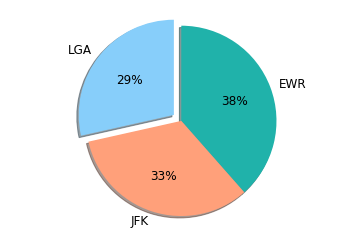

In [46]:
colors = ['lightseagreen', 'lightsalmon', 'lightskyblue']
explode = ( 0, 0, 0.1)

plt.pie(df_merged.Percentage_Delays,explode=explode, labels=df_merged.origin, colors=colors,
        shadow=True, startangle=90, autopct='%1.0f%%',
        counterclock=False, textprops={"fontweight":"normal", "fontsize":"large"})

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

plt.show()

### Q4. Are there any seasonal patterns in departure delays for flights from NYC?

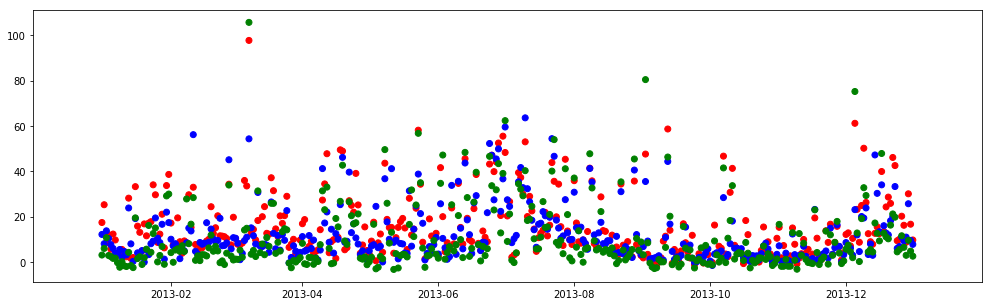

In [47]:
flights_df['fly_date'] =  pd.to_datetime((flights_df.year*10000+flights_df.month*100+flights_df.day).apply(str),format='%Y%m%d')
grouped_df = flights_df.groupby([flights_df.origin, flights_df.fly_date])['dep_delay'].mean().reset_index(name='avg_delay')
dates = [d.to_pydatetime() for d in grouped_df.fly_date]
plt.figure(figsize=(17,5))
colors = np.where(grouped_df["origin"]=='EWR','R',
                 np.where(grouped_df["origin"]=='LGA','G','B'))

plt.scatter(dates, grouped_df.avg_delay, c=colors, cmap=grouped_df.origin)
plt.show()

#### From the plot above, we can state that there is a pattern based on time of the year. Delays are more in mid and end of the year, means there is high traffic during summer and christmas holidays.

### Q4. Which one is the busiest airport in terms of number of flights?

In [48]:
flights_per_dest = flights_df.groupby([flights_df.origin, flights_df.dest]).size().reset_index(name='Count')
flights_per_dest.sort_values(by="Count",ascending=False).head(5)

,origin,dest,Count
116,JFK,LAX,11196
155,LGA,ATL,10082
203,LGA,ORD,8548
145,JFK,SFO,8138
169,LGA,CLT,5969


#### Table shows JFK is the most trafficked airport

### Q5. Which flight departing in 2013 flew the fastest?

In [49]:
#calculate speed with distance and air_time
flights_df['speed'] = flights_df['distance']/flights_df['air_time']

#Filtering based on max overall speed of plane in travelling to its destination
display(flights_df[(flights_df.speed == max(flights_df.speed))]['flight'])

211121    1499
Name: flight, dtype: int64

#### Flight #1499 was the fastest flight in 2013

### Q6. Arrival %age per destination? which one has the highest and which has the lowest?

In [50]:
filtered_flights_df = flights_df[flights_df.arr_delay > 0]
grouped_data = pd.DataFrame(filtered_flights_df.groupby([filtered_flights_df.dest])['arr_delay'].size().reset_index(name='Count'))
grouped_data_non_filtered = pd.DataFrame(flights_df.groupby([flights_df.dest])['arr_delay'].size().reset_index(name='Total_Count'))

#Merging both the dataframes
df_merged = pd.merge(grouped_data, grouped_data_non_filtered, on=['dest'])

df_merged['Percentage_Delays'] = (df_merged.Count/df_merged.Total_Count)*100
print('-'*10, 'Maximum Arrival Delay', '-'*10)
display(df_merged[df_merged.Percentage_Delays == max(df_merged.Percentage_Delays)])
print('-'*10, 'Miniimum Arrival Delay', '-'*10)
display(df_merged[df_merged.Percentage_Delays == min(df_merged.Percentage_Delays)])

---------- Maximum Arrival Delay ----------


,dest,Count,Total_Count,Percentage_Delays
18,CAE,88,107,82.242991


---------- Miniimum Arrival Delay ----------


,dest,Count,Total_Count,Percentage_Delays
62,MVY,61,213,28.638498


### Q7. How many unique flights fly from Newark Liberty International Airport(EWR) to Orlando International Airport(MCO)? 

In [51]:
grouped_df = flights_df.groupby(['origin', 'dest'])
num_of_flights = grouped_df.flight.unique()['EWR']['MCO'].size

print("There are ",num_of_flights," unique flights from EWR to MCO")

There are  269  unique flights from EWR to MCO


### Q8. Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [58]:
grouped_df = flights_df.groupby([flights_df.carrier, flights_df.flight, flights_df.dest]).size().reset_index(name='Count')
grouped_df[grouped_df.Count == max(grouped_df.Count)]

,carrier,flight,dest,Count
1373,B6,1783,MCO,365


#### These 18 flights happen everyday

### Now, lets do some more analysis and try to find insights and reasoning around the hyposthesis

####  H0 : There are more delayed flights than on-time flights

In [22]:
def check_if_delayed(arr_delay):
    if(arr_delay<=0):
        on_time = 1
    else:
        on_time = 0
    return on_time

flights_df['on_time'] = flights_df['arr_delay'].apply(check_if_delayed)

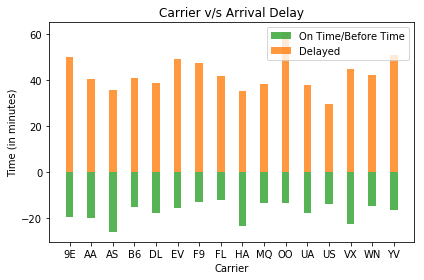

In [23]:
graph_df=pd.DataFrame(flights_df.groupby(['carrier','on_time'])['arr_delay'].mean())
graph_df.reset_index(inplace=True)

graph_df1 = graph_df[graph_df['arr_delay']<=0]
graph_df2 = graph_df[graph_df['arr_delay']>0]

graph_df1.reset_index(level=0, inplace=True)
graph_df2.reset_index(level=0, inplace=True)

fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(graph_df1.carrier, graph_df1.arr_delay, bar_width,
                 alpha=opacity,
                 color='C2',
                 label='On Time/Before Time')
 
rects2 = plt.bar(graph_df2.carrier, graph_df2.arr_delay, bar_width,
                 alpha=opacity,
                 color='C1',
                 label='Delayed')
 
plt.xlabel('Carrier')
plt.ylabel('Time (in minutes)')
plt.title('Carrier v/s Arrival Delay')
plt.legend()
 
plt.tight_layout()
plt.show()

In [27]:
def check_if_delayed(arr_delay):
    if(arr_delay<0):
        time_se = 0
    elif(arr_delay==0):
        time_se = 1
    else:
        time_se = 2
    return time_se

flights_df['time_se'] = flights_df['arr_delay'].apply(check_if_delayed)

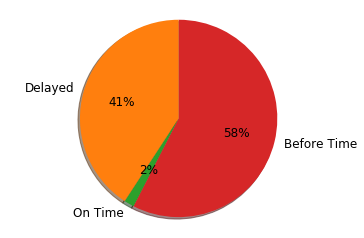

In [31]:
before_time = (flights_df[flights_df.time_se == 0].on_time.size / flights_df.on_time.size) * 100
on_time = (flights_df[flights_df.time_se == 1].on_time.size / flights_df.on_time.size) * 100
delayed = (flights_df[flights_df.time_se == 2].on_time.size / flights_df.on_time.size) * 100

pie_data = pd.Series([before_time, on_time , delayed])
pie_labels = pd.Series(['Before Time','On Time', 'Delayed'])

colors = ['C3', 'C2', 'C1']
explode = ( 0, 0, 0)

plt.pie(pie_data, labels=pie_labels, colors=colors,
        shadow=True, startangle=90, autopct='%1.0f%%',
        counterclock=False, textprops={"fontweight":"normal", "fontsize":"large"})

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

plt.show()

Text(0.5,0.98,'Scatterplot of delays w.r.t day and arrival delay for different origins')

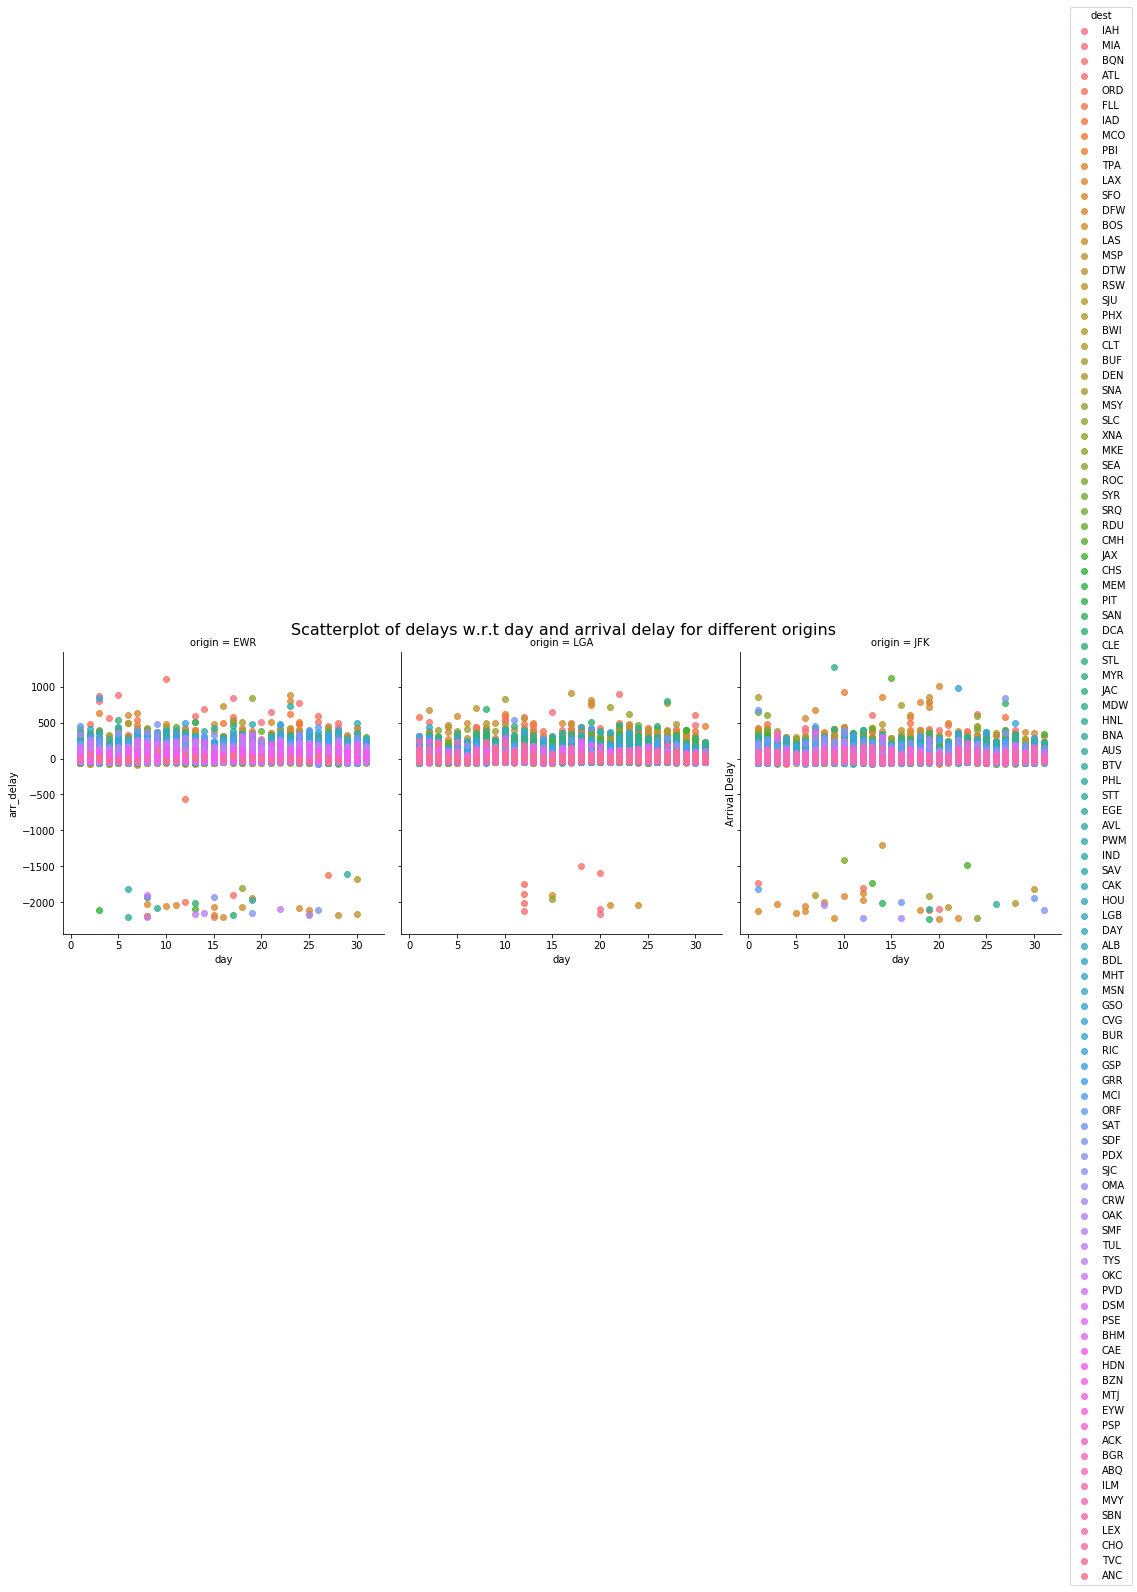

In [25]:
sns.lmplot('day', 'arr_delay', data=flights_df, fit_reg=False, hue="dest", col="origin")
plt.subplots_adjust(top=0.9)
plt.ylabel('Arrival Delay')
plt.suptitle('Scatterplot of delays w.r.t day and arrival delay for different origins', fontsize=16)

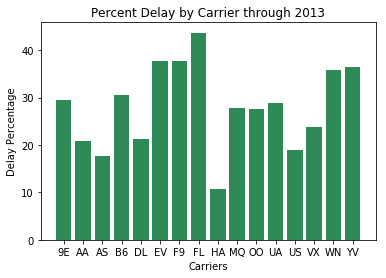

In [34]:
#Fitering dataset for flights having arr_delay>0 and dep_delay>0
flights_df_filtered_carrier = flights_df[(flights_df.arr_delay>0) & (flights_df.dep_delay>0)]  

#Grouping by carrier and getting the count
grouped_career_filtered = flights_df_filtered_carrier.groupby([flights_df_filtered_carrier.carrier]).size().reset_index(name='Size')
grouped_career_filtered

#Removing NA's from dep_time column
flights_df_filtered_total = flights_df[np.isfinite(flights_df['dep_time'])] 

#Grouping by carrier to find the total count for each carrier
grouped_career_total = flights_df_filtered_total.groupby([flights_df_filtered_total.carrier]).size().reset_index(name='Total_Size')
grouped_career_total

#Merging both the dataframes
df_col_merged = pd.merge(grouped_career_filtered, grouped_career_total, on=['carrier'])

#CalculatingPercentage delays
df_col_merged['Percentage_Delays'] = (df_col_merged.Size/df_col_merged.Total_Size)*100

df_col_merged

#Plotting Percent Delay by Carrier through 2013
ind = np.arange(len(df_col_merged.carrier))
plt.bar(ind, df_col_merged.Percentage_Delays, color="seagreen")
plt.ylabel('Delay Percentage')
plt.xlabel('Carriers')
plt.title('Percent Delay by Carrier through 2013')
plt.xticks(ind, df_col_merged.carrier)
plt.show()

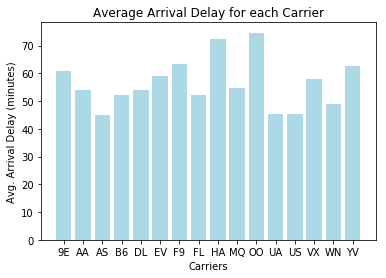

In [40]:
df_mean_arr_delay = flights_df_filtered_carrier.groupby([flights_df_filtered_carrier.carrier])['arr_delay'].mean().reset_index(name='Mean_Arrival_Delay')

#Plotting Average Arrival Delay for each Carrier
ind = np.arange(len(df_mean_arr_delay.carrier))
plt.bar(ind, df_mean_arr_delay.Mean_Arrival_Delay, color="lightblue")
plt.ylabel('Avg. Arrival Delay (minutes)')
plt.xlabel('Carriers')
plt.title('Average Arrival Delay for each Carrier')
plt.xticks(ind, df_col_merged.carrier)
plt.show()